In [18]:
import os
import numpy as np
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Load Data

In [19]:
df = pd.read_csv('Dataset-Mental-Disorders.csv')
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


## Data Exploration

In [20]:
# display the first few rows
print("First few rows of the dataset:")
df.head(5)

First few rows of the dataset:


,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [21]:
# unecessary column
df = df[df.drop('Patient Number', axis=1).columns]

# check for missing values
missing_values = df.isnull().sum()
print(f"\nMissing values in each column:\n{missing_values}")


Missing values in each column:
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64


In [22]:
# check for unique value
for column in df.columns:
    unique_values = df[column].unique()
    print(f"\nUnique values in '{column}':\n{unique_values}")


Unique values in 'Sadness':
['Usually' 'Sometimes' 'Seldom' 'Most-Often']

Unique values in 'Euphoric':
['Seldom' 'Most-Often' 'Usually' 'Sometimes']

Unique values in 'Exhausted':
['Sometimes' 'Usually' 'Seldom' 'Most-Often']

Unique values in 'Sleep dissorder':
['Sometimes' 'Most-Often' 'Usually' 'Seldom']

Unique values in 'Mood Swing':
['YES' 'NO']

Unique values in 'Suicidal thoughts':
['YES' 'NO']

Unique values in 'Anorxia':
['NO' 'YES']

Unique values in 'Authority Respect':
['NO' 'YES']

Unique values in 'Try-Explanation':
['YES' 'NO']

Unique values in 'Aggressive Response':
['NO' 'YES']

Unique values in 'Ignore & Move-On':
['NO' 'YES']

Unique values in 'Nervous Break-down':
['YES' 'NO']

Unique values in 'Admit Mistakes':
['YES' 'NO']

Unique values in 'Overthinking':
['YES' 'NO']

Unique values in 'Sexual Activity':
['3 From 10' '4 From 10' '6 From 10' '5 From 10' '7 From 10' '8 From 10'
 '9 From 10' '2 From 10' '1 From 10']

Unique values in 'Concentration':
['3 From 10

the unique data of column "Suicidal thoughts", is inconsistencies. bcz have 2 YES value within additional space. lets handle it

In [23]:
df['Suicidal thoughts'] = df['Suicidal thoughts'].str.replace(" ", "")

this step involves only encoding, as the data contains no missing values and includes only categorical data. make this early is use for analyze data

In [24]:
# encode
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
    
df.head(5)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,3,1,2,2,1,1,0,0,1,0,0,1,1,1,2,2,3,1
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,3,1,4,2
2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6,0
3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,2,1,1,1
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5,3


## EDA

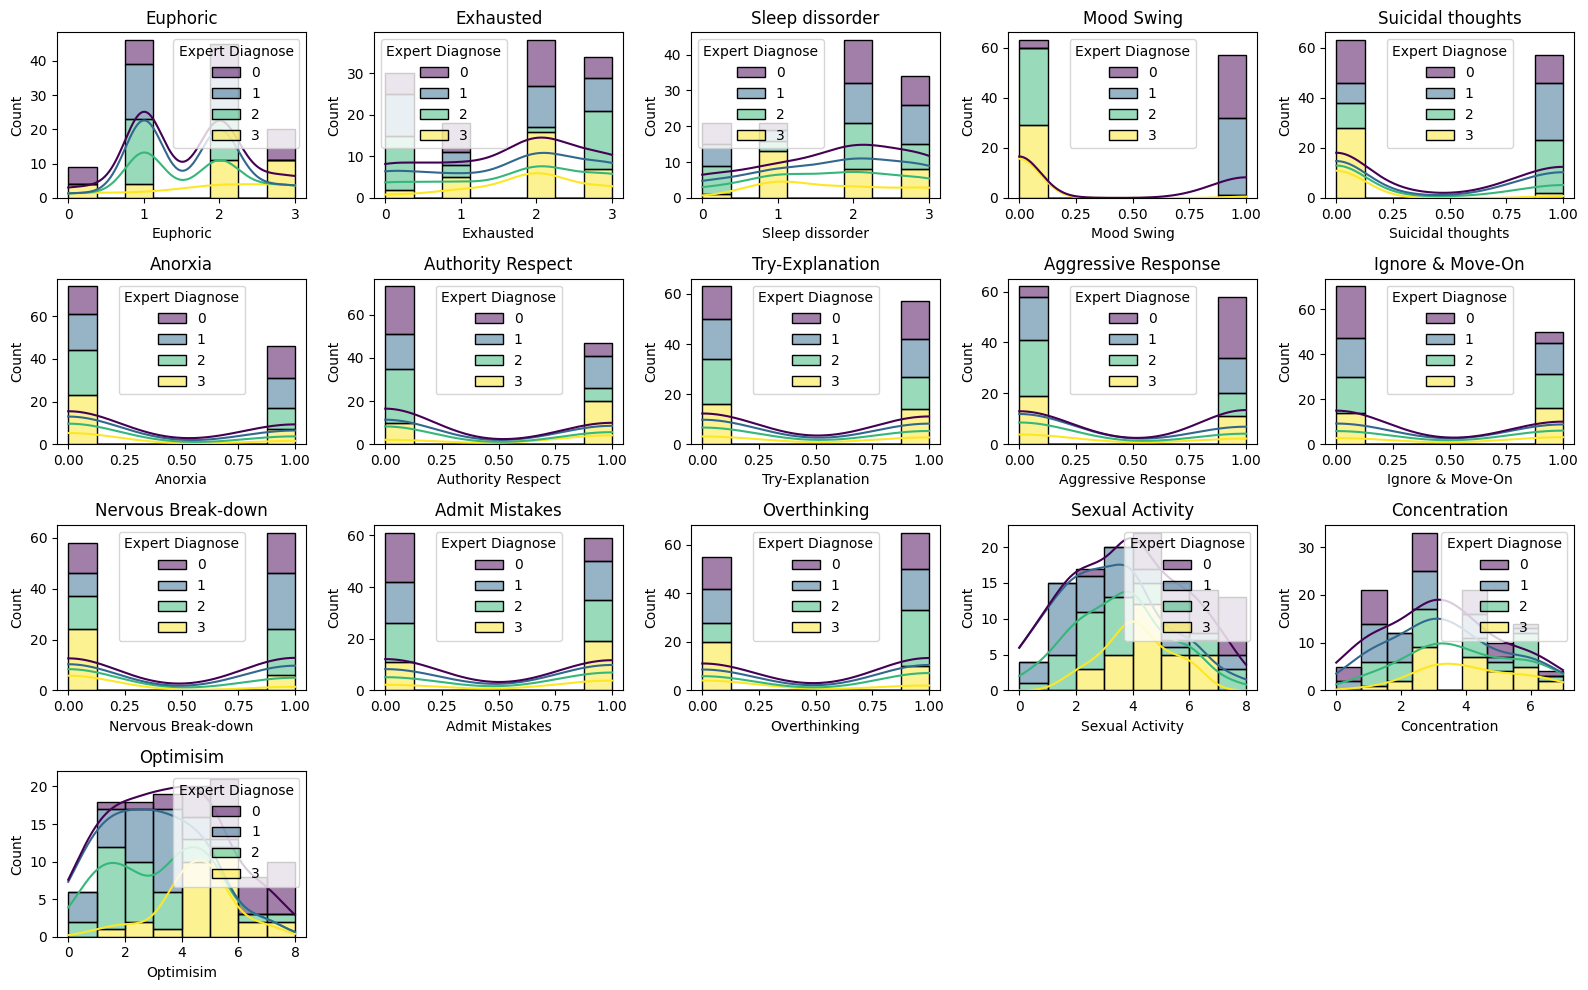

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# visualize the distribution of symptoms for each disorder
plt.figure(figsize=(16, 10))
for symptom in df.columns[1:-1]:  
    plt.subplot(4, 5, df.columns.get_loc(symptom))
    sns.histplot(data=df, x=symptom, hue='Expert Diagnose', multiple="stack", kde=True, palette="viridis")
    plt.title(symptom)

plt.tight_layout()
plt.show()

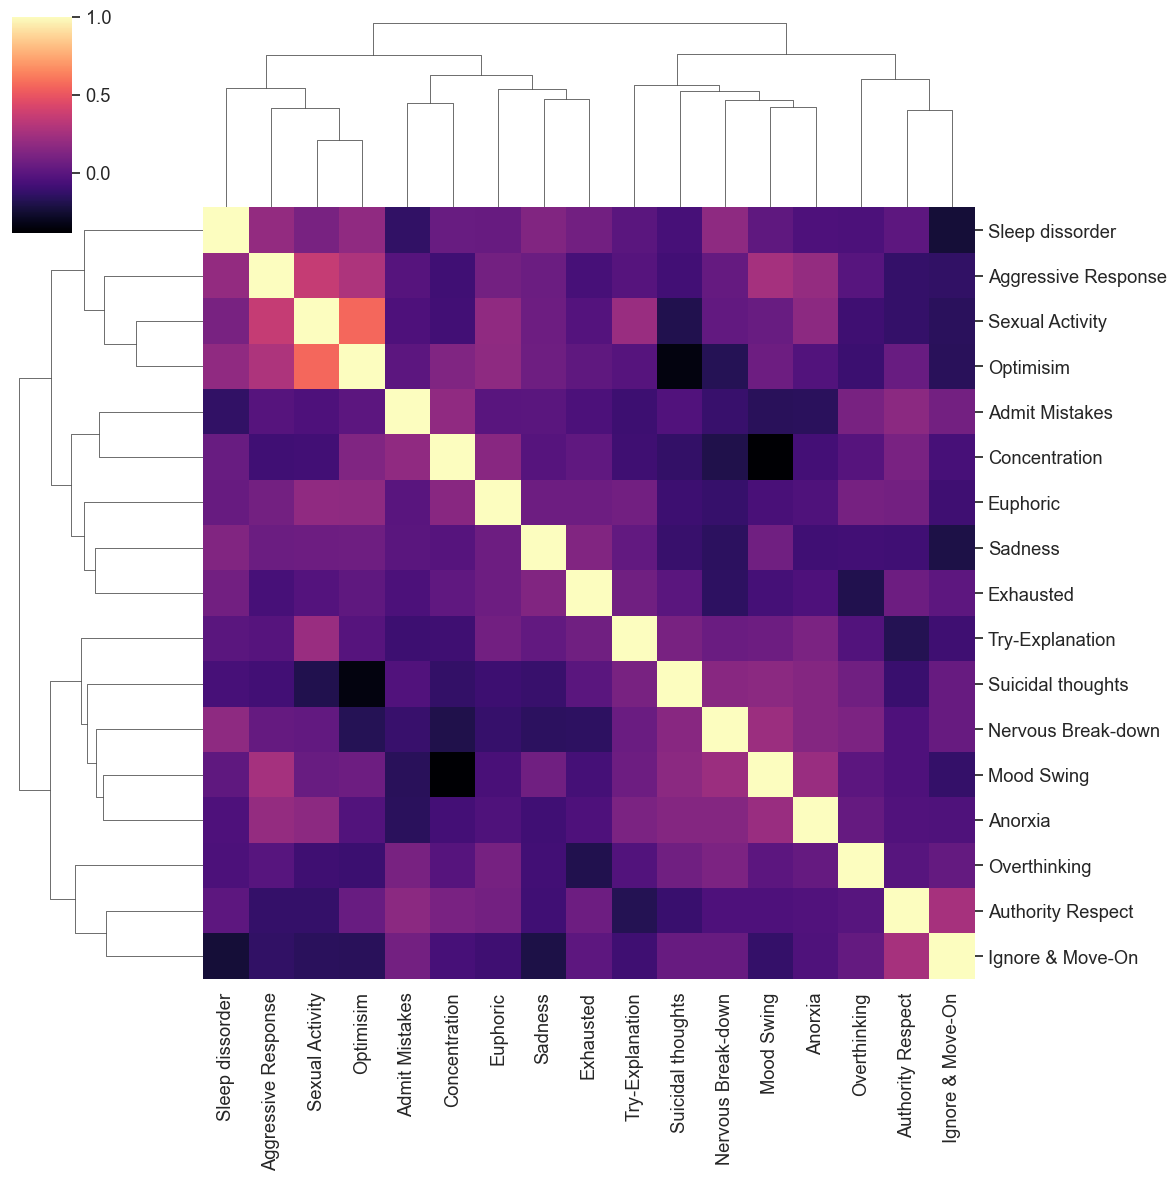

In [26]:
# create a clustermap
sns.set(font_scale=1.2)
clustermap = sns.clustermap(df.drop('Expert Diagnose', axis=1).corr(), cmap='magma', method='complete', figsize=(12, 12))
plt.show()

## Preprocessing

In [27]:
# split
from sklearn.model_selection import train_test_split

X = df.drop('Expert Diagnose', axis=1)
y = df['Expert Diagnose']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

In [28]:
# resample
from imblearn.over_sampling import RandomOverSampler

smote = RandomOverSampler()
X_train, y_train = smote.fit_resample(X_train, y_train)

Ensure that the training set remains unchanged.

In [29]:
X_train, y_train

(     Sadness  Euphoric  Exhausted  Sleep dissorder  Mood Swing  \
 0          2         1          3                2           0   
 1          3         1          2                2           1   
 2          1         3          3                3           1   
 3          3         1          2                2           1   
 4          3         2          0                2           1   
 ..       ...       ...        ...              ...         ...   
 103        3         1          3                3           1   
 104        0         2          3                2           1   
 105        3         2          0                3           1   
 106        3         1          2                2           1   
 107        1         1          2                2           1   
 
      Suicidal thoughts  Anorxia  Authority Respect  Try-Explanation  \
 0                    0        0                  1                0   
 1                    1        0                  

## Modeling

In [30]:
# model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 15],
    'min_samples_leaf': [1, 4, 5],
    'max_features': ['sqrt', 'log2']
}

rf_classifier = RandomForestClassifier()
rf_random_search = RandomizedSearchCV(rf_classifier, param_distributions=rf_param_grid, n_iter=45, scoring='accuracy', cv=5, n_jobs=-1, random_state=67)
rf_random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=45,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 4, 5],
                                        'min_samples_split': [2, 10, 15],
                                        'n_estimators': [50, 100, 200]},
                   random_state=67, scoring='accuracy')

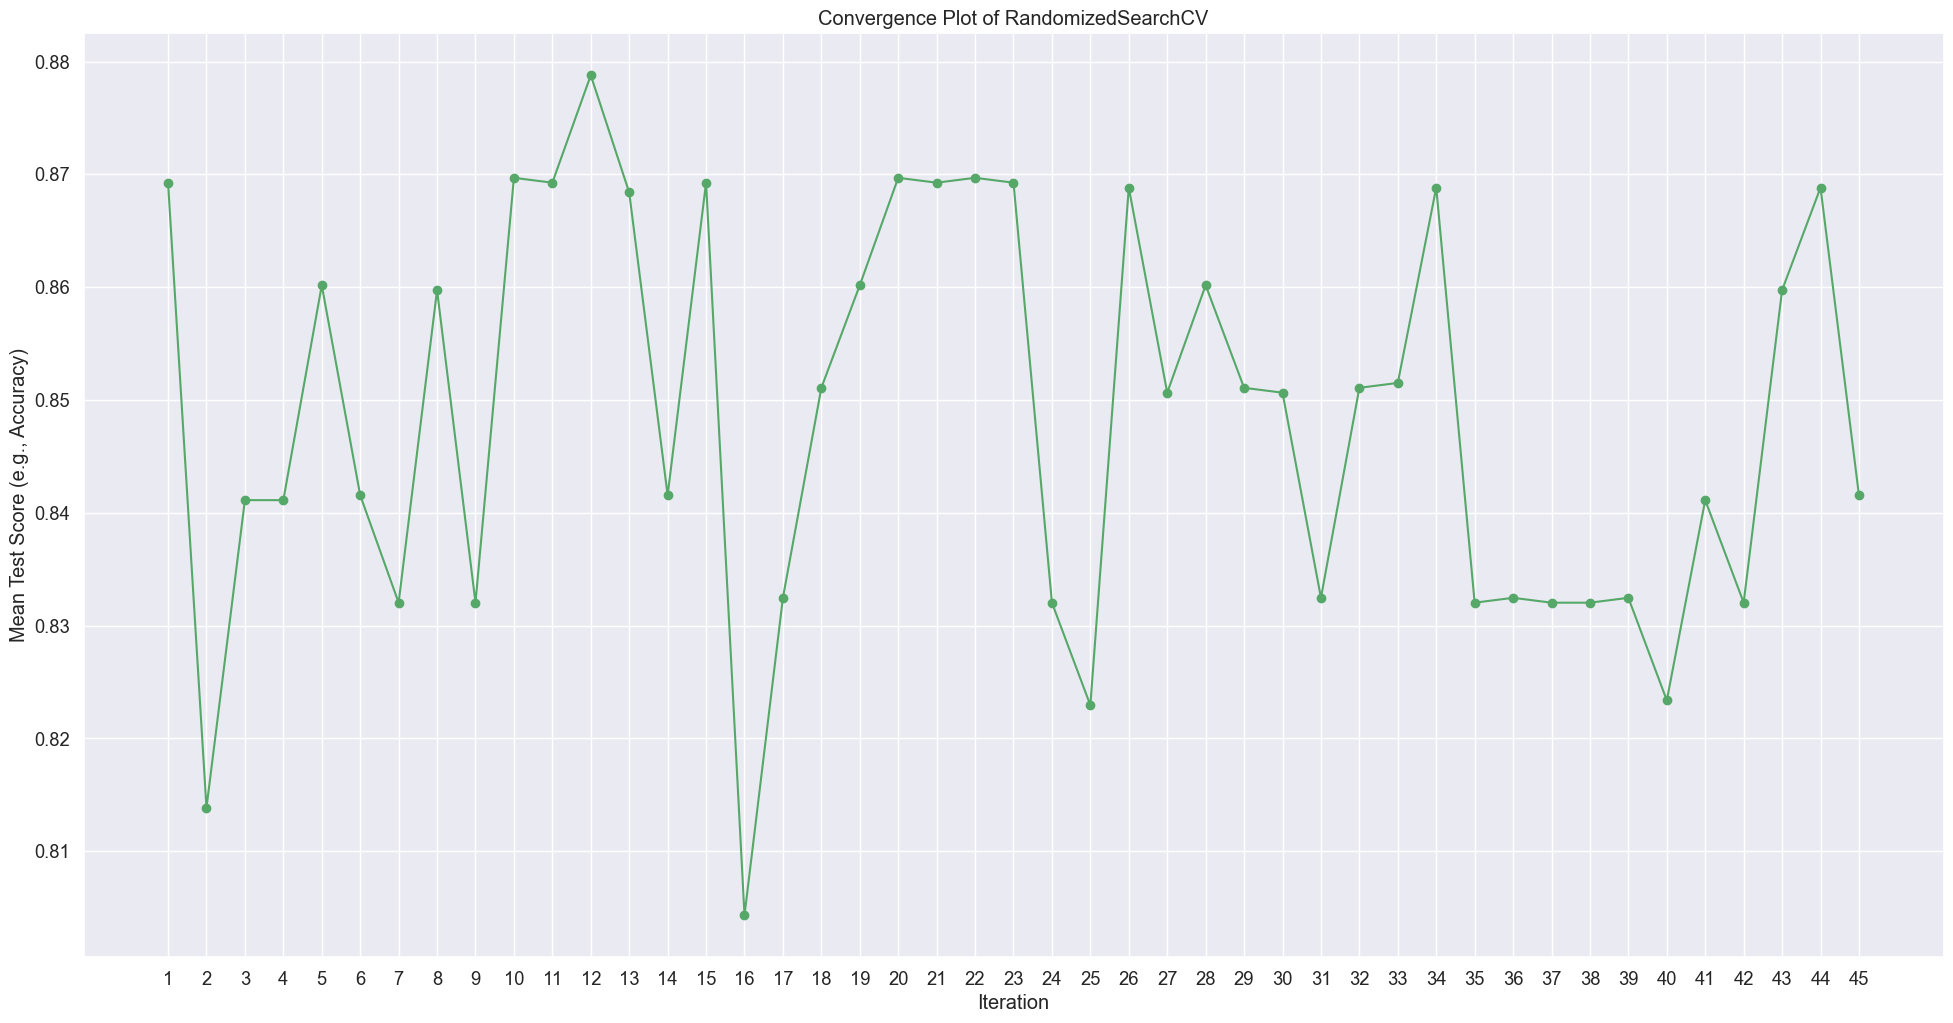

In [31]:
# plot convergence of hyperparameter tuning
mean_test_scores = rf_random_search.cv_results_['mean_test_score']
params = rf_random_search.cv_results_['params']
n_iterations = len(mean_test_scores)

plt.figure(figsize=(24, 12))
plt.plot(range(1, n_iterations + 1), mean_test_scores, marker='o', linestyle='-', color='g')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score (e.g., Accuracy)')
plt.title('Convergence Plot of RandomizedSearchCV')
plt.xticks(np.arange(1, n_iterations + 1))
plt.grid(True)
plt.show()

## Evaluation

In [32]:
from sklearn.metrics import classification_report, accuracy_score

best_rf_model = rf_random_search.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Classifier:\n\nBest Hyperparameters: {rf_random_search.best_params_}")
print(f"\nAccuracy: {accuracy_rf:.4f}\n\nClassification Report:\n{report_rf}")

Random Forest Classifier:

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 10}

Accuracy: 0.9583

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        12
           2       1.00      0.75      0.86         4
           3       0.75      1.00      0.86         3

    accuracy                           0.96        24
   macro avg       0.94      0.94      0.93        24
weighted avg       0.97      0.96      0.96        24



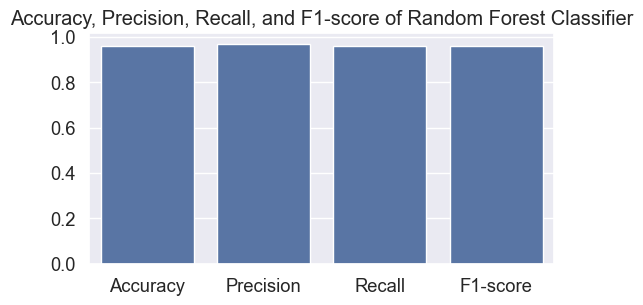

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 3))
sns.barplot(x=metrics, y=values)
plt.title('Accuracy, Precision, Recall, and F1-score of Random Forest Classifier')
plt.show()

The model demonstrates impressive performance :-)

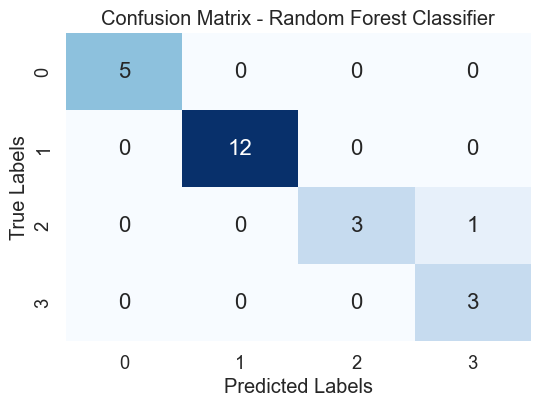

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

Thank you for reading this notebook until the end. I hope it helpfull. Happy learning! :-)

In [35]:
import joblib

# تصدير النموذج المدرب بشكل نهائي
# يجب تشغيل جميع الخلايا السابقة الخاصة بالنمذجة والتقييم أولاً
# إذا لم تكن المتغيرات معرفة سيظهر تنبيه واضح
try:
    joblib.dump(best_rf_model, 'random_forest_model_96.pkl')
    with open('model_accuracy.txt', 'w') as f:
        f.write(f'Final Model Accuracy: {accuracy_rf * 100:.2f}%')
    print(f'تم تصدير النموذج بنجاح. الدقة النهائية: {accuracy_rf * 100:.2f}%')
except Exception as e:
    print("تنبيه: يجب تشغيل جميع الخلايا الخاصة بالنمذجة والتقييم قبل تصدير النموذج (خلايا بناء وتدريب وتقييم النموذج).\nتفاصيل الخطأ:")
    print(e)

تم تصدير النموذج بنجاح. الدقة النهائية: 95.83%
